In [1]:
from sklearn.model_selection import train_test_split
from pycaret.classification import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [2]:
import pycaret
print(pycaret.__version__)

3.3.2


In [3]:
# read data
data = pd.read_csv('DataTask1.csv')

# get more information about data
# information about datatype of features, features, missing values
data.describe()
data.info()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
#Unnamed: 32  column consists only of missing value and will be excluded from the dataset, all other variables do not have missing values
data = data.drop('Unnamed: 32', axis=1)

# Data Visualization

In [5]:
# Manually encode the target column using LabelEncoder
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])  # Encodes 'B' to 0 and 'M' to 1

# Check the encoded target values
print(data['diagnosis'].head())


0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


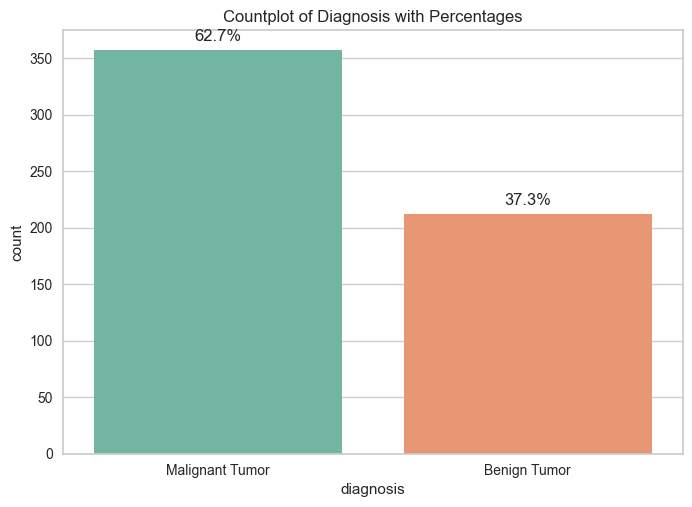

In [6]:
#Visualize the distribution of the target variable within the dataset

ax = sns.countplot(x='diagnosis', data=data, palette='Set2')
total = len(data)

# Annotate each bar with percentages
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_xticklabels(['Malignant Tumor', 'Benign Tumor'])
plt.title("Countplot of Diagnosis with Percentages")
plt.show()


In [7]:
# delete target value for correlation matrix
data_values= data.drop('diagnosis', axis= 1)

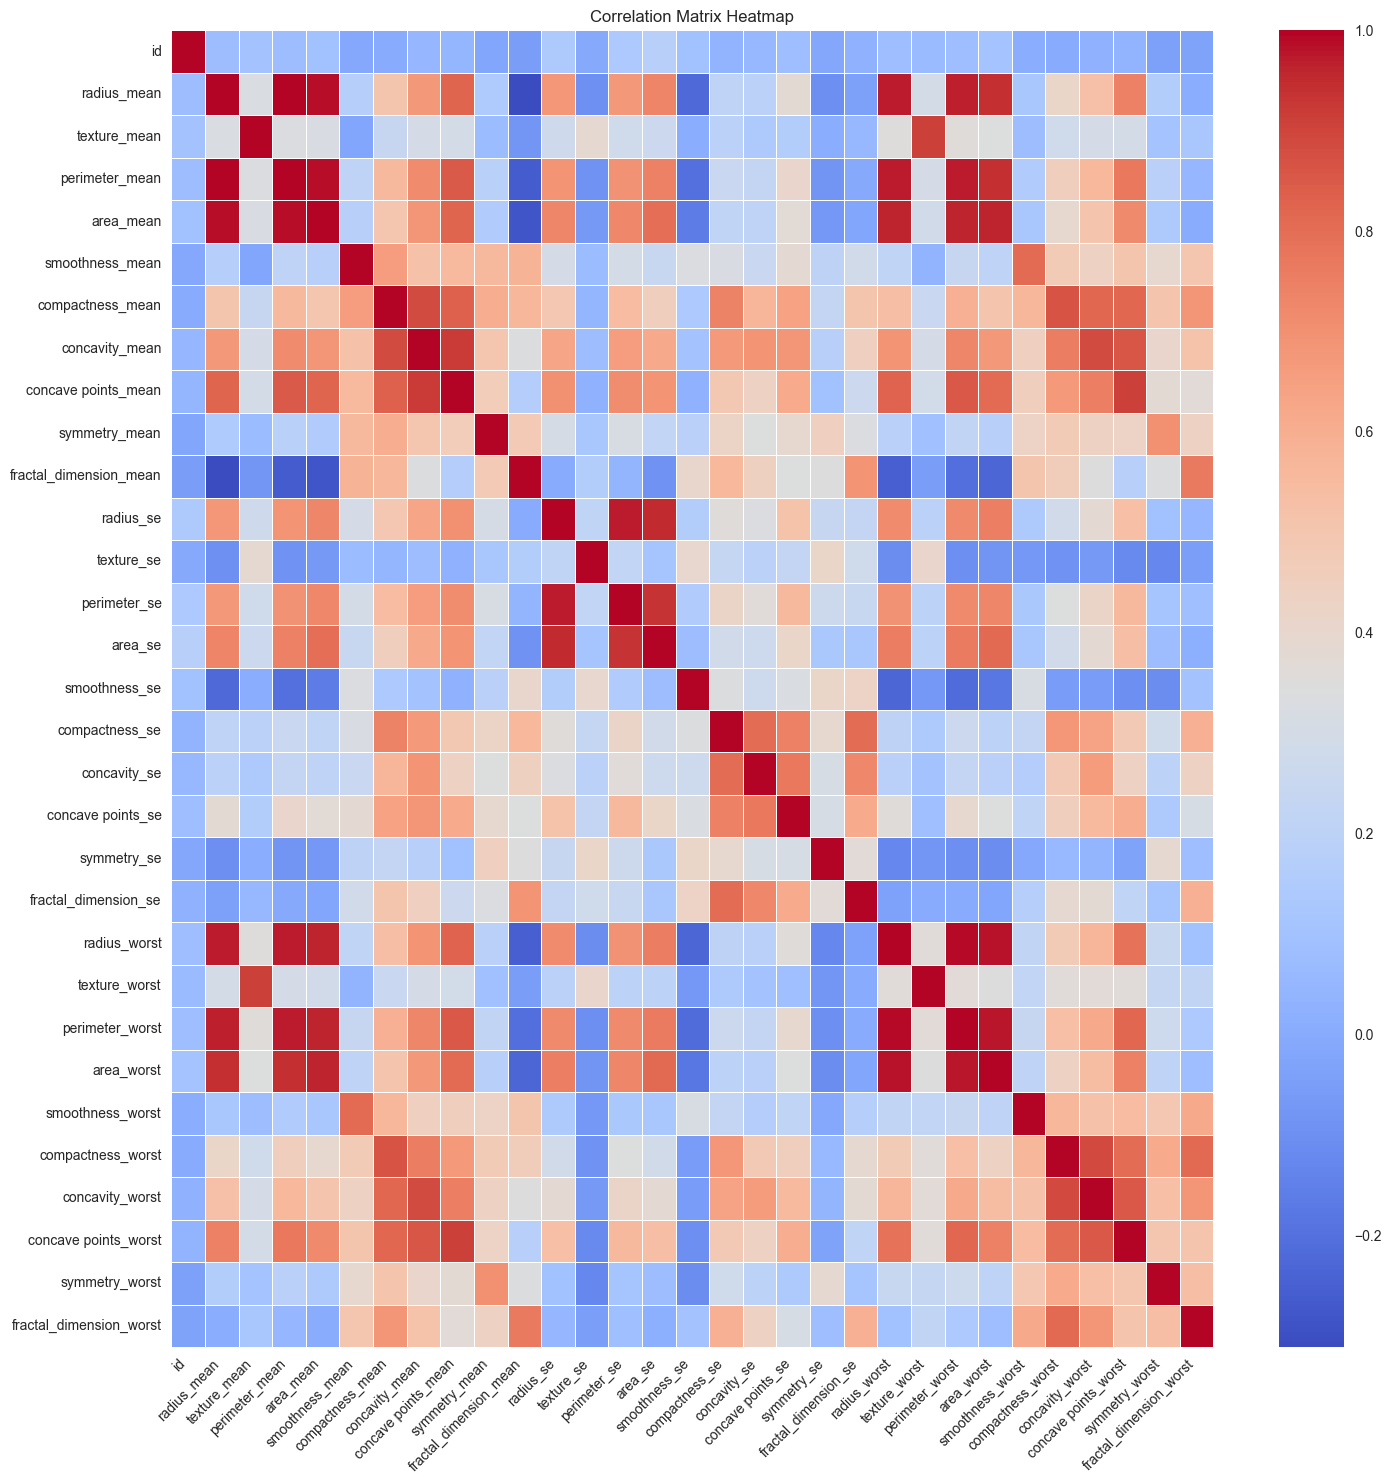

In [8]:
# Correlation matrix
correlation_matrix = data_values.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=False,  cmap='coolwarm', linewidths=0.5, 
            yticklabels=True, xticklabels=True, cbar=True)
plt.xticks(rotation =45, ha= 'right')
plt.yticks(rotation =0, fontsize= 10)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [9]:
# generate a data subset with features that showed high correlation within the correlation matrix
high_corr_features = data[['radius_mean','perimeter_mean','area_mean','radius_worst',
                       'perimeter_worst', 'area_worst','diagnosis']]

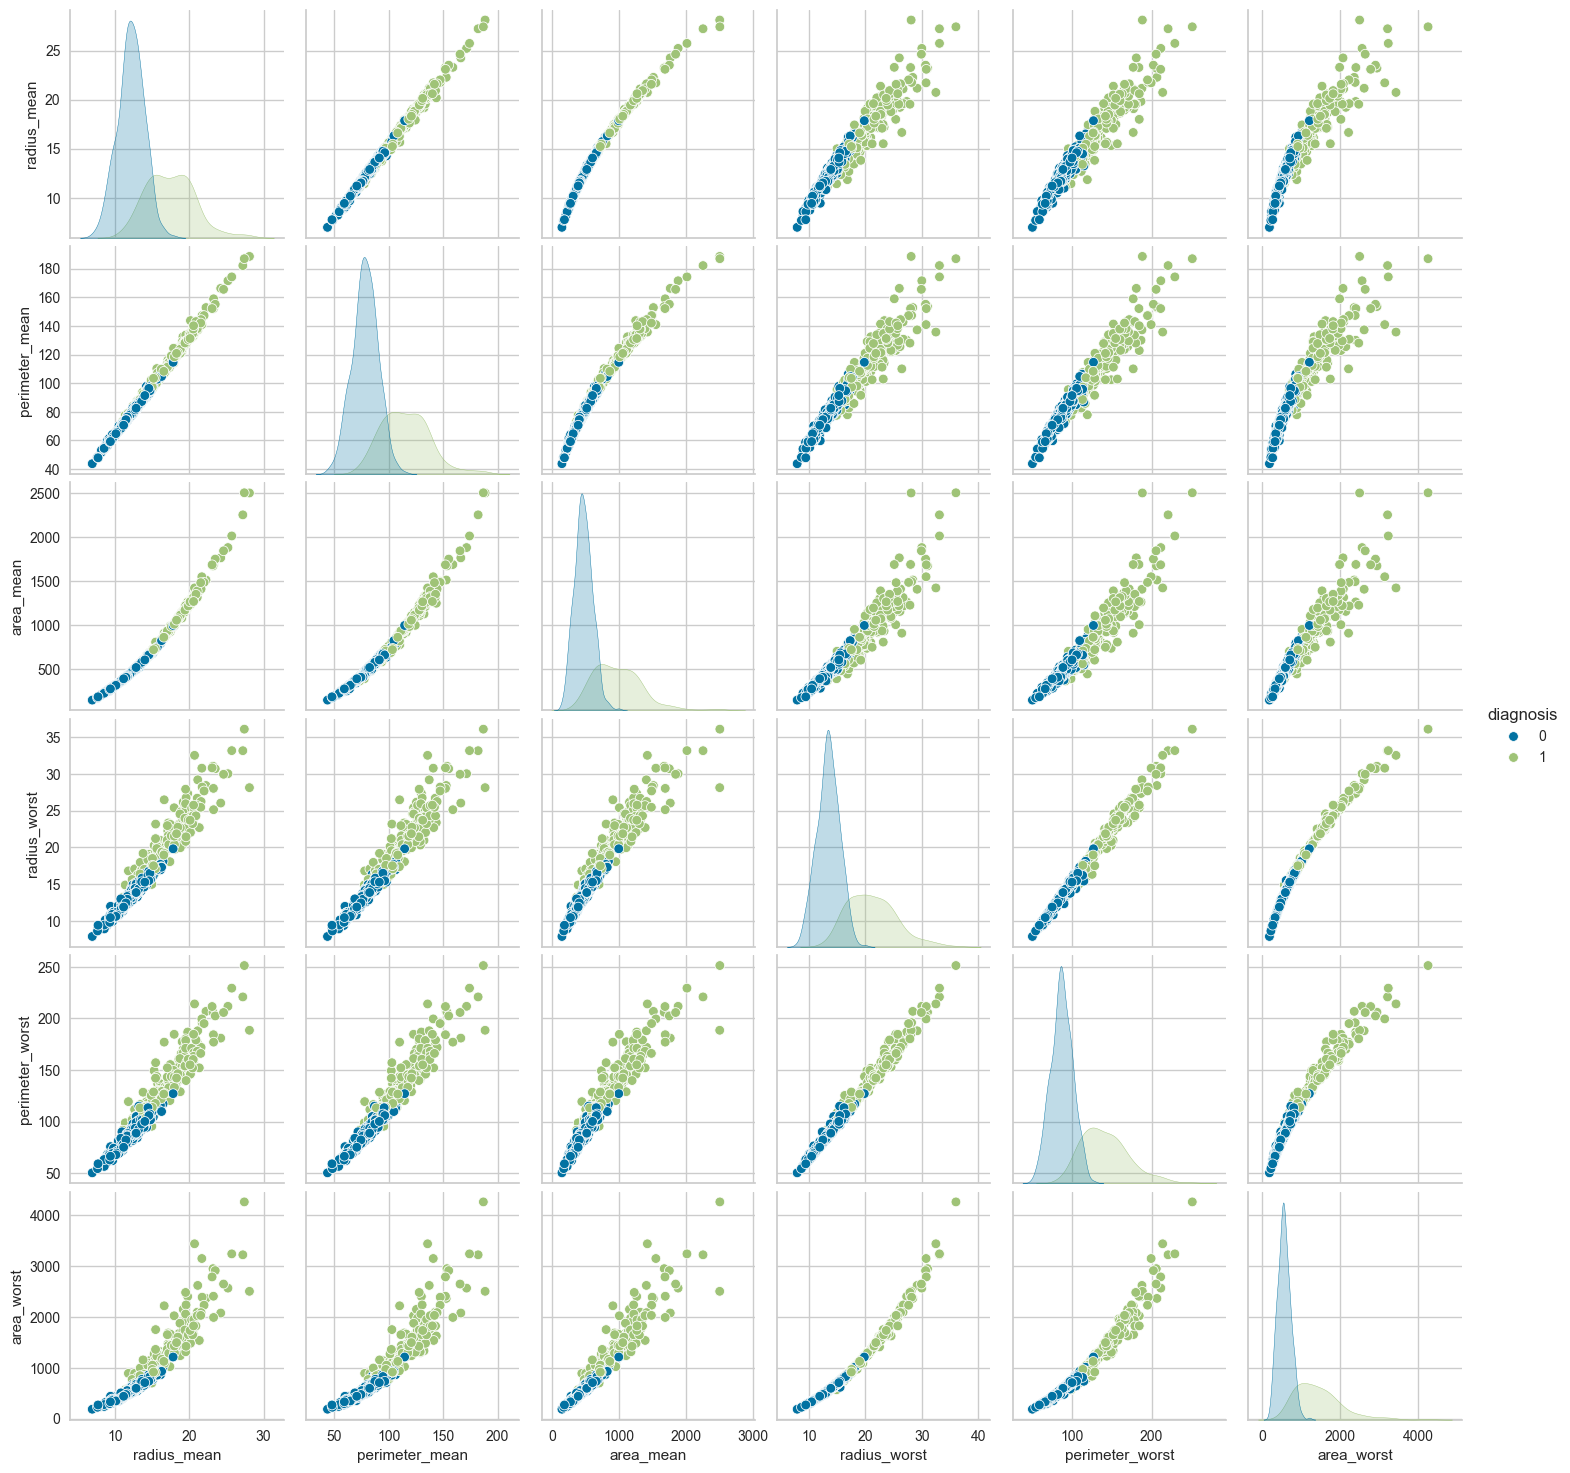

In [10]:
# visualize the distribution of the features from the subset in scatterplots, legend description: 'B' to 0 and 'M' to 1
sns.pairplot(high_corr_features, hue='diagnosis')  
plt.show()

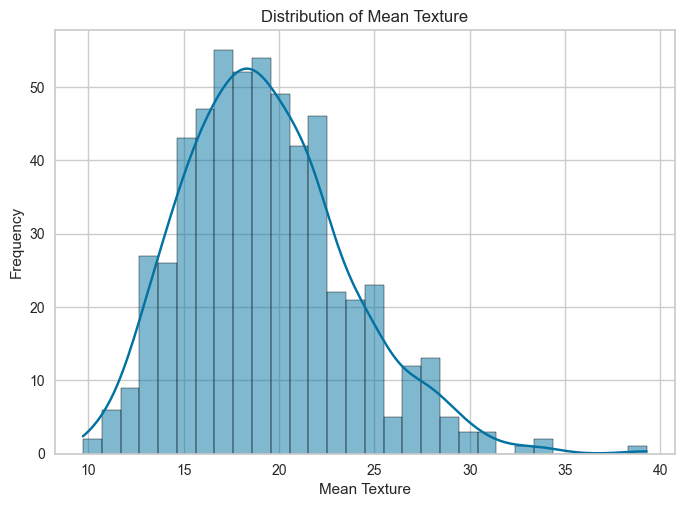

In [11]:
# Plot a histogram of the 'mean texture' feature, showing a normal gaussian distribution
sns.histplot(data['texture_mean'], bins=30, kde=True)
plt.title('Distribution of Mean Texture')
plt.xlabel('Mean Texture')
plt.ylabel('Frequency')
plt.show()

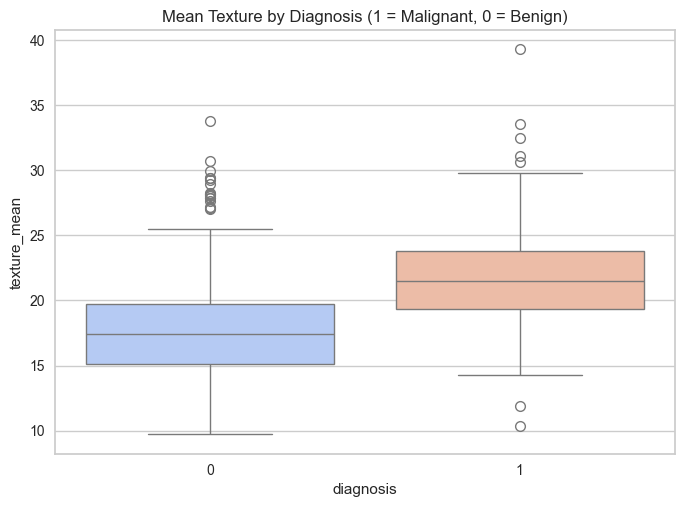

In [12]:
# Box plot for 'mean texture' feature by diagnosis
sns.boxplot(x='diagnosis', y='texture_mean', data=data, palette='coolwarm')
plt.title('Mean Texture by Diagnosis (1 = Malignant, 0 = Benign)')
plt.show()


# Pipeline

In [13]:
# pycaret preprocessing pipeline:
    # normilize using zscore
    # split train, and test subsets with 70% train test
    #numeric imputation mean,
    #categorical imputation mode

clf_setup = setup(data=data, 
                    target='diagnosis', 
                    normalize=True,         
                    normalize_method='zscore',
                    session_id=123)
                    


,Description,Value
0,Session id,123
1,Target,diagnosis
2,Target type,Binary
3,Original data shape,"(569, 32)"
4,Transformed data shape,"(569, 32)"
5,Transformed train set shape,"(398, 32)"
6,Transformed test set shape,"(171, 32)"
7,Numeric features,31
8,Preprocess,True
9,Imputation type,simple


In [14]:
# compare the performance of different classification models with preprocessed data
best_model = compare_models(fold=10)
best_model



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9849,0.9986,0.9662,0.9938,0.9790,0.9673,0.9684,0.1490
svm,SVM - Linear Kernel,0.9724,0.9987,0.9662,0.9640,0.9635,0.9414,0.9433,0.0040
knn,K Neighbors Classifier,0.9673,0.9850,0.9329,0.9804,0.9547,0.9292,0.9315,0.0090
ada,Ada Boost Classifier,0.9648,0.9940,0.9395,0.9666,0.9517,0.9241,0.9257,0.0190
et,Extra Trees Classifier,0.9647,0.9967,0.9462,0.9617,0.9521,0.9242,0.9263,0.0200
ridge,Ridge Classifier,0.9599,0.9976,0.8990,0.9938,0.9422,0.9118,0.9163,0.0050
lda,Linear Discriminant Analysis,0.9599,0.9923,0.8924,1.0000,0.9412,0.9112,0.9165,0.0050
rf,Random Forest Classifier,0.9572,0.9935,0.9462,0.9469,0.9439,0.9094,0.9128,0.0260
gbc,Gradient Boosting Classifier,0.9547,0.9929,0.9390,0.9437,0.9391,0.9031,0.9059,0.0480
lightgbm,Light Gradient Boosting Machine,0.9547,0.9937,0.9190,0.9589,0.9368,0.9017,0.9041,0.1170


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
#Tunes the hyperparameters of the given machine learning model to improve its performance.
tuned_model = tune_model(best_model)
tuned_model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9750,1.0000,1.0000,0.9375,0.9677,0.9474,0.9487
1,0.9500,0.9947,0.8667,1.0000,0.9286,0.8904,0.8958
2,0.9750,1.0000,0.9333,1.0000,0.9655,0.9459,0.9473
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9750,1.0000,0.9333,1.0000,0.9655,0.9459,0.9473
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9744,0.9914,0.9286,1.0000,0.9630,0.9434,0.9449


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
#Displays an interactive dashboard to evaluate the performance of a trained machine learning model 

evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [18]:
# predict labels with test subset (20% of dataset) on the bases of the tuned model and return evaluation metrics
results_model= predict_model(tuned_model)
results_model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9649,0.9873,0.9531,0.9531,0.9531,0.9251,0.9251


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,prediction_label,prediction_score
115,864685,11.930000,21.530001,76.529999,438.600006,0.09768,0.07849,0.03328,0.02008,0.1688,...,583.000000,0.15000,0.2399,0.15030,0.07247,0.2438,0.08541,0,0,0.9909
21,8510824,9.504000,12.440000,60.340000,273.899994,0.10240,0.06492,0.02956,0.02076,0.1815,...,314.899994,0.13240,0.1148,0.08867,0.06227,0.2450,0.07773,0,0,1.0000
382,90250,12.050000,22.719999,78.750000,447.799988,0.06935,0.10730,0.07943,0.02978,0.1203,...,488.399994,0.08799,0.3214,0.29120,0.10920,0.2191,0.09349,0,0,0.9999
136,868223,11.710000,16.670000,74.720001,423.600006,0.10510,0.06095,0.03592,0.02600,0.1339,...,546.700012,0.12710,0.1028,0.10460,0.06968,0.1712,0.07343,0,0,0.9995
2,84300903,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.19740,0.12790,0.2069,...,1709.000000,0.14440,0.4245,0.45040,0.24300,0.3613,0.08758,1,1,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,91813701,13.460000,18.750000,87.440002,551.099976,0.10750,0.11380,0.04201,0.03152,0.1723,...,719.799988,0.16240,0.3124,0.26540,0.14270,0.3518,0.08665,0,1,0.5206
142,869218,11.430000,17.309999,73.660004,398.000000,0.10920,0.09486,0.02031,0.01861,0.1645,...,503.000000,0.14130,0.1792,0.07708,0.06402,0.2584,0.08096,0,0,0.9997
238,883270,14.220000,27.850000,92.550003,623.900024,0.08223,0.10390,0.11030,0.04408,0.1342,...,764.000000,0.10810,0.2426,0.30640,0.08219,0.1890,0.07796,0,0,0.5226
106,863031,11.640000,18.330000,75.169998,412.500000,0.11420,0.10170,0.07070,0.03485,0.1801,...,521.700012,0.16880,0.2660,0.28730,0.12180,0.2806,0.09097,0,0,0.8989


In [19]:
#select features that have a lr coefficient of more than 0.8
selected_features = data[['texture_worst', 'concavity_worst', 'radius_se', 'symmetry_worst', 'smoothness_worst', 'concavity_mean','fractal_dimension_se','area_se', 'diagnosis']]

In [20]:
# do a preprocessing on new datasets, which includes selected features
clf_setup2 = setup(data=selected_features, 
                    target='diagnosis',
                    normalize=True,          
                    normalize_method='zscore',
                    session_id=123,
                  fold = 20)
                    

,Description,Value
0,Session id,123
1,Target,diagnosis
2,Target type,Binary
3,Original data shape,"(569, 9)"
4,Transformed data shape,"(569, 9)"
5,Transformed train set shape,"(398, 9)"
6,Transformed test set shape,"(171, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [21]:
# find best model for new dataset
best_model2= compare_models(fold=20)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9675,0.9956,0.9607,0.9592,0.9571,0.9310,0.9345,0.0025
lr,Logistic Regression,0.9674,0.9967,0.9339,0.9811,0.9535,0.9287,0.9329,0.0035
gbc,Gradient Boosting Classifier,0.9574,0.9941,0.9357,0.9562,0.9412,0.9083,0.9133,0.0165
lightgbm,Light Gradient Boosting Machine,0.9574,0.9952,0.9295,0.9639,0.9393,0.9074,0.9146,0.1125
knn,K Neighbors Classifier,0.9550,0.9790,0.9071,0.9695,0.9336,0.9002,0.9048,0.0070
ada,Ada Boost Classifier,0.9549,0.9937,0.9304,0.9561,0.9355,0.9020,0.9092,0.0090
qda,Quadratic Discriminant Analysis,0.9522,0.9912,0.9277,0.9482,0.9347,0.8973,0.9011,0.0035
ridge,Ridge Classifier,0.9500,0.9896,0.8741,0.9929,0.9255,0.8889,0.8968,0.0030
lda,Linear Discriminant Analysis,0.9500,0.9891,0.8741,0.9929,0.9255,0.8889,0.8968,0.0035
et,Extra Trees Classifier,0.9499,0.9947,0.9232,0.9498,0.9301,0.8919,0.8984,0.0160


In [22]:
# logistic regressen was chosen to proceed, since it does include natively prediction probability of each classification in comparison to SVM
lr = create_model('lr')
lr

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9500,1.0000,1.0000,0.8889,0.9412,0.8980,0.9027
2,0.9500,1.0000,0.8750,1.0000,0.9333,0.8936,0.8987
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9500,1.0000,0.8750,1.0000,0.9333,0.8936,0.8987
6,0.9500,1.0000,0.8750,1.0000,0.9333,0.8936,0.8987
7,0.8500,1.0000,0.6250,1.0000,0.7692,0.6667,0.7071
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# use tuning pipeline from pycaret to optimize the model
tuned_lr= tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9500,1.0000,1.0000,0.8889,0.9412,0.8980,0.9027
2,0.9500,0.9896,0.8750,1.0000,0.9333,0.8936,0.8987
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9500,1.0000,0.8750,1.0000,0.9333,0.8936,0.8987
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,1.0000,0.7500,1.0000,0.8571,0.7826,0.8018
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 20 folds for each of 10 candidates, totalling 200 fits


In [24]:
# setup maunal grid search settings
lr_grid = { 'C': [0.01, 0.1, 1, 10, 100],#Regularization strength 
           'penalty': ['l1', 'l2', 'elasticnet', 'none'], # Regularization types 
           'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'], # Solvers (SAGA supports ElasticNet) 
           'max_iter': [100, 200, 500] # Max iterations to ensure convergence
          }

In [25]:
# run manual grid search
grid_search_lr = tune_model(lr, custom_grid=lr_grid)
grid_search_lr

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9500,1.0000,1.0000,0.8889,0.9412,0.8980,0.9027
2,0.9500,1.0000,0.8750,1.0000,0.9333,0.8936,0.8987
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9500,1.0000,0.8750,1.0000,0.9333,0.8936,0.8987
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,1.0000,0.7500,1.0000,0.8571,0.7826,0.8018
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 20 folds for each of 10 candidates, totalling 200 fits


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# manual grid search yielded slightly better results and is used for further analysis. 
# held out testing subset (30%) of dataset is used to predict labels, returns label, label prediction, and evaluation metric
results_lr = predict_model(grid_search_lr, data= selected_features)
results_lr

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9666,0.9919,0.9481,0.9617,0.9549,0.9284,0.9284


,texture_worst,concavity_worst,radius_se,symmetry_worst,smoothness_worst,concavity_mean,fractal_dimension_se,area_se,diagnosis,prediction_label,prediction_score
0,17.330000,0.7119,1.0950,0.4601,0.16220,0.30010,0.006193,153.399994,1,1,1.0000
1,23.410000,0.2416,0.5435,0.2750,0.12380,0.08690,0.003532,74.080002,1,1,0.9859
2,25.530001,0.4504,0.7456,0.3613,0.14440,0.19740,0.004571,94.029999,1,1,1.0000
3,26.500000,0.6869,0.4956,0.6638,0.20980,0.24140,0.009208,27.230000,1,1,0.9997
4,16.670000,0.4000,0.7572,0.2364,0.13740,0.19800,0.005115,94.440002,1,1,0.9995
...,...,...,...,...,...,...,...,...,...,...,...
564,26.400000,0.4107,1.1760,0.2060,0.14100,0.24390,0.004239,158.699997,1,1,1.0000
565,38.250000,0.3215,0.7655,0.2572,0.11660,0.14400,0.002498,99.040001,1,1,1.0000
566,34.119999,0.3403,0.4564,0.2218,0.11390,0.09251,0.003892,48.549999,1,1,0.9730
567,39.419998,0.9387,0.7260,0.4087,0.16500,0.35140,0.006185,86.220001,1,1,1.0000


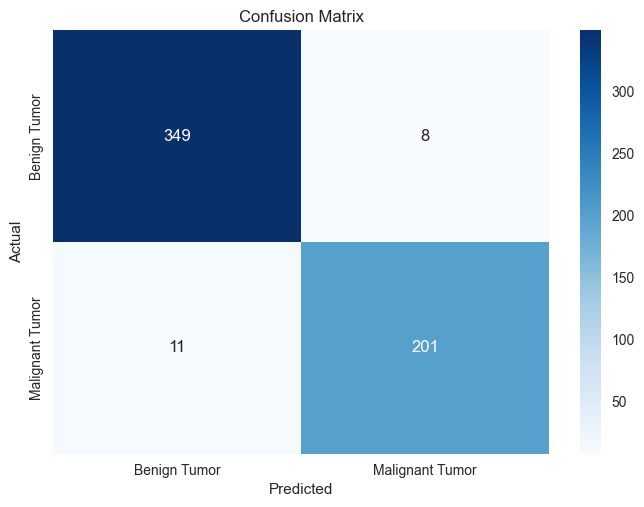

In [27]:
# Plot the confusion matrix using seaborn's heatmap of hwole dataset

true_value= results_lr['diagnosis']
pred_value = results_lr['prediction_label']


cm = confusion_matrix(true_value, pred_value)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign Tumor', 'Malignant Tumor'], yticklabels=['Benign Tumor', 'Malignant Tumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [28]:
# #Displays an interactive dashboard to evaluate the performance of a trained machine learning model 
evaluate_model(grid_search_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [29]:
# finalize the model by using the whole dataset to train the model
final_lr = finalize_model(grid_search_lr)



In [30]:
# show settings of the whole pipeline
print(final_lr)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['texture_worst', 'concavity_worst',
                                             'radius_se', 'symmetry_worst',
                                             'smoothness_worst',
                                             'concavity_mean',
                                             'fractal_dimension_se',
                                             'area_se'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_valu...
                 TransformerWrapper(exclude=None, include=No

In [31]:
# shows performance metrics of the model, when the whole dataset was used for thraining-
predict_model(final_lr, data= selected_features)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9684,0.9947,0.9434,0.9709,0.9569,0.9319,0.9322


,texture_worst,concavity_worst,radius_se,symmetry_worst,smoothness_worst,concavity_mean,fractal_dimension_se,area_se,diagnosis,prediction_label,prediction_score
0,17.330000,0.7119,1.0950,0.4601,0.16220,0.30010,0.006193,153.399994,1,1,1.0000
1,23.410000,0.2416,0.5435,0.2750,0.12380,0.08690,0.003532,74.080002,1,1,0.9928
2,25.530001,0.4504,0.7456,0.3613,0.14440,0.19740,0.004571,94.029999,1,1,1.0000
3,26.500000,0.6869,0.4956,0.6638,0.20980,0.24140,0.009208,27.230000,1,1,0.9980
4,16.670000,0.4000,0.7572,0.2364,0.13740,0.19800,0.005115,94.440002,1,1,0.9998
...,...,...,...,...,...,...,...,...,...,...,...
564,26.400000,0.4107,1.1760,0.2060,0.14100,0.24390,0.004239,158.699997,1,1,1.0000
565,38.250000,0.3215,0.7655,0.2572,0.11660,0.14400,0.002498,99.040001,1,1,1.0000
566,34.119999,0.3403,0.4564,0.2218,0.11390,0.09251,0.003892,48.549999,1,1,0.9207
567,39.419998,0.9387,0.7260,0.4087,0.16500,0.35140,0.006185,86.220001,1,1,1.0000


In [32]:
# save pipeline
save_model(final_lr, 'lr_breast_cancer_classifier')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['texture_worst', 'concavity_worst',
                                              'radius_se', 'symmetry_worst',
                                              'smoothness_worst',
                                              'concavity_mean',
                                              'fractal_dimension_se',
                                              'area_se'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_valu...
                  TransformerWrapper(exclude=N